In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

regression= pd.read_csv('regression.csv')

regression['Week']= pd.to_datetime(regression['Week'],format='%m/%d/%y')

regression['Sales']= regression['Sales'].str.replace(',','')

regression['Sales']= pd.to_numeric(regression['Sales'])


In [2]:
regression

,Week,Sales,Promos,month
0,2010-02-07,47500886,136,2
1,2010-02-14,49373641,124,2
2,2010-02-21,53390280,121,2
3,2010-02-28,52616149,105,2
4,2010-03-07,56698808,124,3
...,...,...,...,...
159,2013-02-24,131943800,119,2
160,2013-03-03,130381432,137,3
161,2013-03-10,149657576,138,3
162,2013-03-17,130740842,139,3


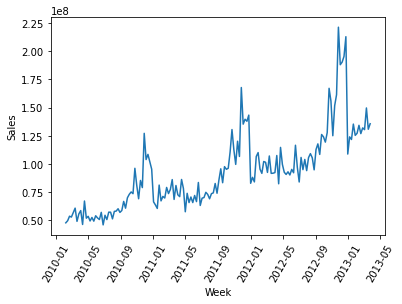

In [3]:
import matplotlib.pyplot as plt
sns.lineplot(x='Week',y='Sales',data=regression)
plt.xticks(rotation=60)
plt.show()

In [9]:
regression['trend']= range(regression.shape[0])

In [5]:
regression

,Week,Sales,Promos,month,trend
0,2010-02-07,47500886,136,2,0
1,2010-02-14,49373641,124,2,1
2,2010-02-21,53390280,121,2,2
3,2010-02-28,52616149,105,2,3
4,2010-03-07,56698808,124,3,4
...,...,...,...,...,...
159,2013-02-24,131943800,119,2,159
160,2013-03-03,130381432,137,3,160
161,2013-03-10,149657576,138,3,161
162,2013-03-17,130740842,139,3,162


In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import seaborn as sns
from sktime.forecasting.base import ForecastingHorizon

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction

from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.ets import AutoETS
import seaborn as sns

from lightgbm import LGBMRegressor
import pandas as pd
import datetime
from sktime.forecasting.compose import ForecastingPipeline
from sktime.forecasting.model_selection import (
 
    ForecastingGridSearchCV,
   ExpandingWindowSplitter,SlidingWindowSplitter)
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError
import numpy as np
from sktime.transformations.series.summarize import WindowSummarizer
from sktime.forecasting.model_evaluation import evaluate
from sktime.transformations.series.impute import Imputer